<a href="https://colab.research.google.com/github/Nisal-Sashmitha/DL-assignment/blob/IT20614980-Thennakoon-T.M.S.K.S/ResNet50V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import zipfile

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [14]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [10]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

melanoma-skin-cancer-dataset-of-10000-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!ls

'Blue Sky Sea Horizon Sunrise Instagram Inspirational Reels Video.mp4'
'_Cinematic Motivational Life Quotes Video Instagram Story.mp4'
'Colab Notebooks'
 College_Website
 College.zip
 Dataset
 D.zip
 eclipse-jee-2022-09-R-win32-x86_64.zip
 enviroment
 IMG-20230206-WA0034.jpg
 IMG-20230206-WA0035.jpg
 Kaggle
 kv.zip
'nature rain ambience (Your Story).mp4'
'Rain Modern Quotes Tiktok Video.mp4'
'Screenshot_2023-02-06-21-40-03-032_com (1).whatsapp.jpg'
 Screenshot_2023-02-06-21-40-03-032_com.whatsapp.jpg
'Screenshot_2023-02-06-21-41-11-346_com (1).whatsapp.jpg'
'Screenshot_2023-02-06-21-41-11-346_com (2).whatsapp.jpg'
 Screenshot_2023-02-06-21-41-11-346_com.whatsapp.jpg
 Screenshot_2023-02-06-21-41-15-940_com.whatsapp.jpg
 Screenshot_2023-02-06-21-41-44-456_com.whatsapp.jpg
 VN20221105_170815.mp4
'WhatsApp Chat with Nadeesha Dushani (1).txt'
'WhatsApp Chat with Nadeesha Dushani.txt'
'WhatsApp Image 2022-12-30 at 18.00.20.jpeg'
'White Simple Quote Mobile Video.mp4'


In [15]:
zip_ref = zipfile.ZipFile("melanoma-skin-cancer-dataset-of-10000-images.zip")
zip_ref.extractall("/tmp")
zip_ref.close()

In [1]:
import numpy as np
import os
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [2]:
train_dir ="/tmp/melanoma_cancer_dataset/train"
test_dir = "/tmp/melanoma_cancer_dataset/test"

In [17]:
print(os.listdir("/tmp/melanoma_cancer_dataset"))

['test', 'train']


In [16]:
print("Train classes", os.listdir(train_dir))
print("Test classes", os.listdir(test_dir))

Train classes ['benign', 'malignant']
Test classes ['benign', 'malignant']


In [19]:
batch_size = 32
img_height = 224
img_width = 224

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9605 files belonging to 2 classes.
Using 7684 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9605 files belonging to 2 classes.
Using 1921 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


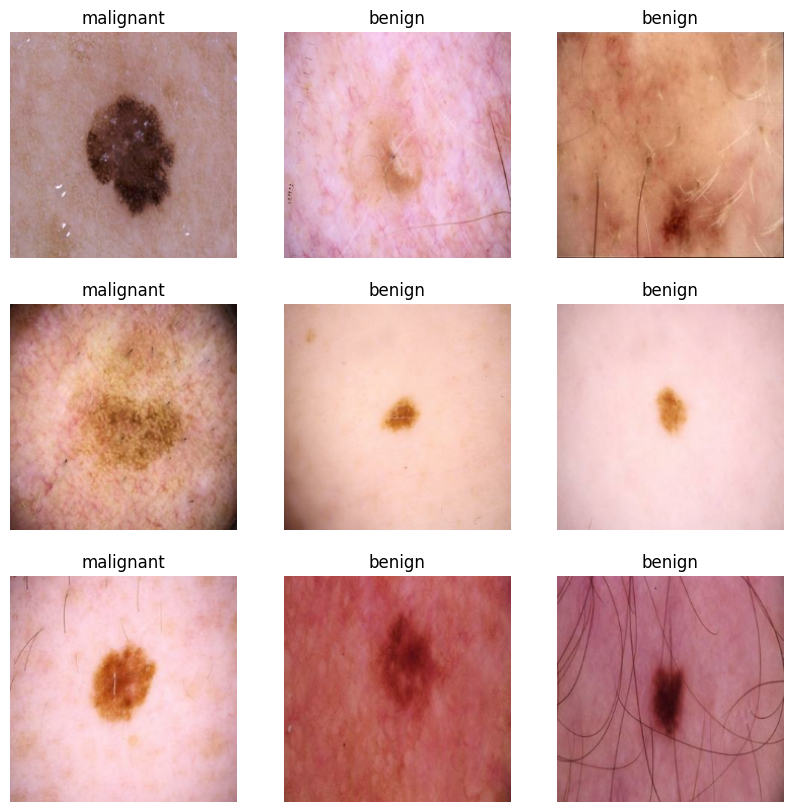

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
# Get the class names from tf.data.Dataset.class_names
class_names = train_ds.class_names

# Initialize a dictionary to store class counts
class_counts = {class_name: 0 for class_name in class_names}
# Iterate through the dataset and count images for each class
for _, labels in train_ds.as_numpy_iterator():
    for label in labels:
        class_name = class_names[label]
        class_counts[class_name] += 1

# Print the counts for each class
print(class_counts)

{'benign': 3969, 'malignant': 3715}


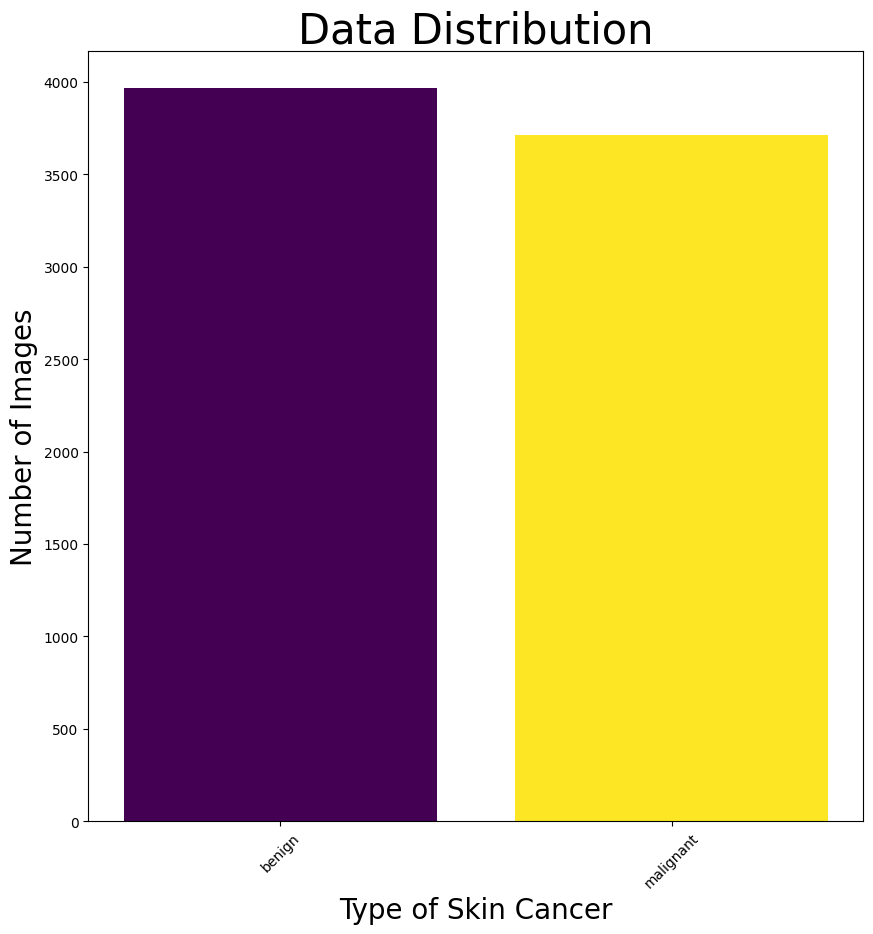

In [26]:

keys = class_counts.keys()
vals = class_counts.values()

colors = plt.cm.viridis(np.linspace(0, 1, len(keys)))

plt.figure(figsize=(10, 10))
plt.bar(keys, vals, color=colors)
plt.title('Data Distribution', fontsize=30)
plt.ylabel('Number of Images', fontsize=20)
plt.xlabel('Type of Skin Cancer', fontsize=20)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

plt.show()
# sns.barplot(x=keys, y=vals)

Overall Mean per Channel: [181.60083 144.4334  137.64499]
Overall Standard Deviation per Channel: [55.596607 53.219933 56.74044 ]


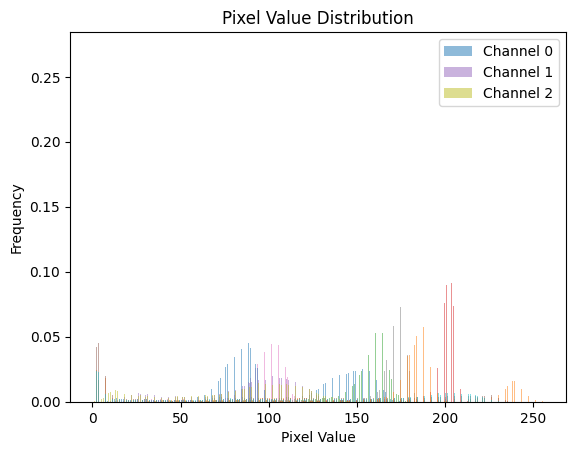

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize empty lists to store image statistics
mean_values = []
std_dev_values = []

# Iterate through the train dataset to compute statistics
for images, _ in train_ds.as_numpy_iterator():
    # Calculate mean and standard deviation per channel
    mean_per_channel = np.mean(images, axis=(0, 1, 2))
    std_dev_per_channel = np.std(images, axis=(0, 1, 2))

    mean_values.append(mean_per_channel)
    std_dev_values.append(std_dev_per_channel)

# Calculate overall mean and standard deviation across all images
overall_mean = np.mean(mean_values, axis=0)
overall_std_dev = np.mean(std_dev_values, axis=0)

# Plot histograms of pixel values for each channel
for channel in range(3):  # Assuming 3 channels (RGB)
    pixel_values = [img[:,:,channel].ravel() for img in images]
    plt.hist(pixel_values, bins=256, range=(0, 256), density=True, alpha=0.5, label=f'Channel {channel}')

plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Print image statistics
print("Overall Mean per Channel:", overall_mean)
print("Overall Standard Deviation per Channel:", overall_std_dev)

plt.show()

In [28]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

resnet50V2 = ResNet50V2(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

94668760/94668760 [==============================] - 5s 0us/step


In [31]:
resnet50V2.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [32]:
for layer in resnet50V2.layers:
  layer.trainable = False

In [33]:
num_classes = 2

In [34]:
x = layers.Flatten()(resnet50V2.output)
x = layers.Dense(128, activation='sigmoid')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='sigmoid')(x)

# Final prediction layer
prediction = layers.Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=resnet50V2.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [37]:
from datetime import datetime
epochs=10
start = datetime.now()
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
241/241 [==============================] - 32s 133ms/step - loss: 0.7018 - accuracy: 0.5061 - val_loss: 0.6878 - val_accuracy: 0.5367
Epoch 2/10
241/241 [==============================] - 28s 118ms/step - loss: 0.6976 - accuracy: 0.5115 - val_loss: 0.6900 - val_accuracy: 0.4633
Epoch 3/10
241/241 [==============================] - 29s 120ms/step - loss: 0.6982 - accuracy: 0.5092 - val_loss: 0.7106 - val_accuracy: 0.5367
Epoch 4/10
241/241 [==============================] - 28s 118ms/step - loss: 0.6967 - accuracy: 0.5095 - val_loss: 0.6915 - val_accuracy: 0.5367
Epoch 5/10
241/241 [==============================] - 29s 119ms/step - loss: 0.6970 - accuracy: 0.5095 - val_loss: 0.6925 - val_accuracy: 0.5367
Epoch 6/10
241/241 [==============================] - 29s 120ms/step - loss: 0.6965 - accuracy: 0.5069 - val_loss: 0.6908 - val_accuracy: 0.5367
Epoch 7/10
241/241 [==============================] - 29s 119ms/step - loss: 0.6966 - accuracy: 0.5014 - val_loss: 0.6909 - val_ac

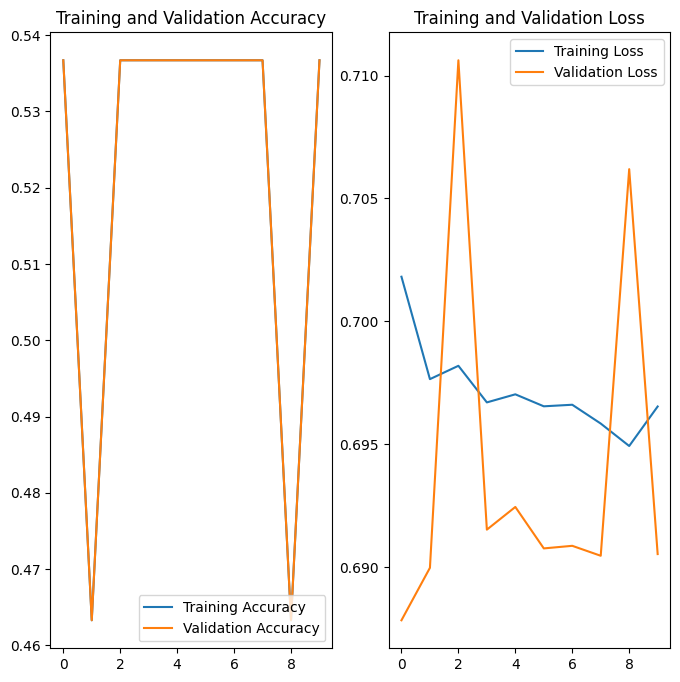

In [39]:
val_acc = history.history['val_accuracy']



loss = history.history['loss']

val_loss = history.history['val_loss']



epochs_range = range(epochs)



plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, val_acc, label='Training Accuracy')

plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')

plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')

plt.title('Training and Validation Loss')

plt.show()

In [40]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(

  test_dir,

  seed=123,

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 1000 files belonging to 2 classes.


In [41]:
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the test results.
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


32/32 [==============================] - 4s 124ms/step - loss: 0.6950 - accuracy: 0.5000
Test loss: 0.69499272108078
Test accuracy: 0.5


In [42]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and make predictions
for images, labels in test_ds.as_numpy_iterator():
    # Predict using the model
    predictions = model.predict(images)

    # Convert predicted probabilities to class labels
    predicted_class = np.argmax(predictions, axis=1)

    true_labels.extend(labels)
    predicted_labels.extend(predicted_class)

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the accuracy score and classification report
print("Accuracy Score:", accuracy)
print(report)

1/1 [==============================] - 1s 878ms/step
Accuracy Score: 0.5
              precision    recall  f1-score   support

      benign       0.50      1.00      0.67       500
   malignant       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
